# IMPORTING LIBRARY

In [25]:
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# PREPARING AND DOWNLOADING OF CIFAR-10 DATASET

In [26]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# VERIFYING THE DATA

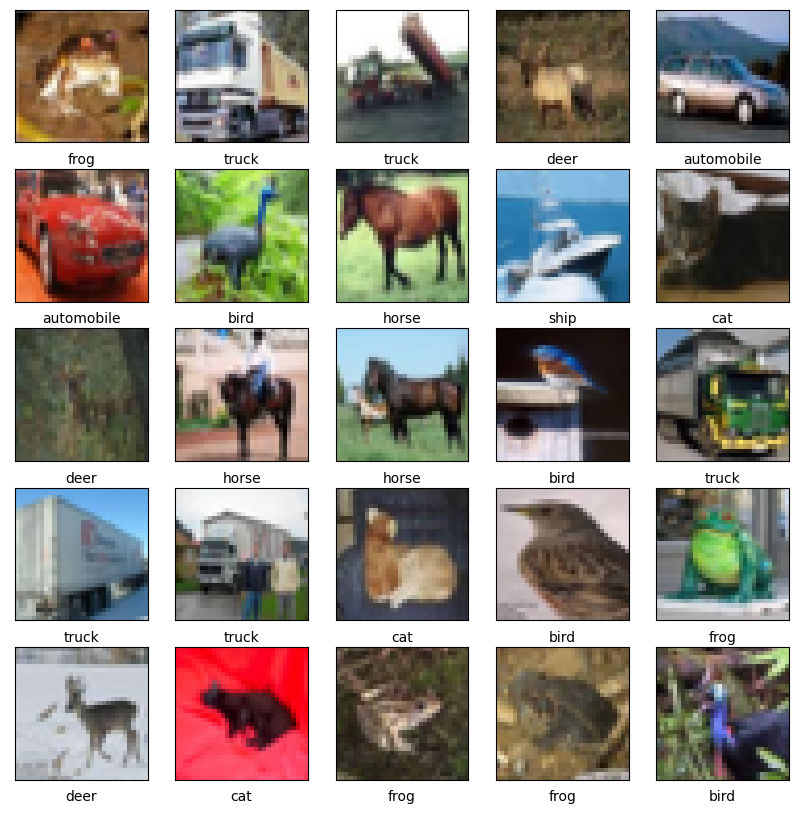

In [27]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# DESIGNING THE CNN MODEL

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# COMPILING AND TRAINING THE CNN MODEL

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5279 - accuracy: 0.4415 - val_loss: 1.2983 - val_accuracy: 0.5379
Epoch 2/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.1623 - accuracy: 0.5876 - val_loss: 1.1139 - val_accuracy: 0.6122
Epoch 3/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0195 - accuracy: 0.6409 - val_loss: 1.1041 - val_accuracy: 0.6114
Epoch 4/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9271 - accuracy: 0.6734 - val_loss: 0.9327 - val_accuracy: 0.6718
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8558 - accuracy: 0.7000 - val_loss: 0.8914 - val_accuracy: 0.6833
Epoch 6/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.7973 - accuracy: 0.7209 - val_loss: 0.8798 - val_accuracy: 0.6988
Epoch 7/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7526 - accuracy: 0.7344 - val_loss: 0.8797 -

# PLOTTING CONFUSION MATRIX

313/313 [==============================] - 3s 8ms/step


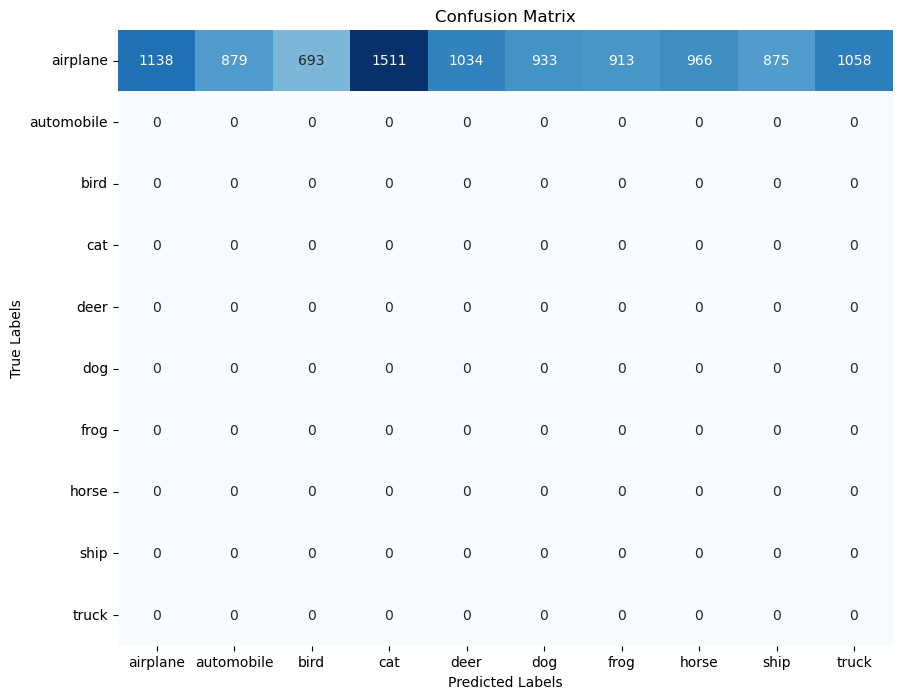

In [30]:
predictions = np.argmax(model.predict(test_images), axis=-1)
conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), predictions)


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# EVALUATING ACCURACY AND LOSS

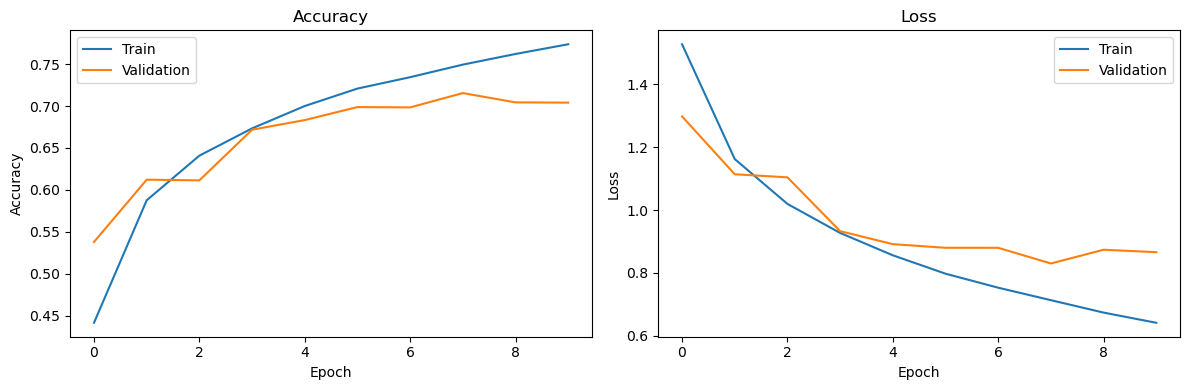

In [31]:
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# CHECKING THE MODEL ACCURACY

In [32]:
print(test_acc)

0.7053999900817871
